# SimpleRNN Test Code

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
from keras import models, layers

## 1. Simple RNN - without Normalization

### 1) Sample Data
- Input Data 생성(100, 5, 1)

In [3]:
X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3] , X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

- Output 데이터 생성(100, 1)

In [4]:
y = [(i + 5) for i in range(100)]

y[:3] , y[-3:]

([5, 6, 7], [102, 103, 104])

### 2) Numpy array casting

In [6]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

### 3) Train/Test Split
- 8:2

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

### 4) Keras SimpleRNN Modeling

#### (1) Model Define & Summary
- Unit(output_dim) : 3
- input_shape(input_length, input_dim) : (5, 1)
- return_sequences = False : 최종 Sequence만 출력
- layers.Dense(1) : y_hat

In [11]:
model_1 = models.Sequential(name = 'SimpleRNN_1')

model_1.add(layers.SimpleRNN(3,
                             input_shape = (5, 1), # 5번을 돌아야 함
                             return_sequences = False)) # 5번 중 마지막 output 하나만 출력
                            # activation을 주지않은 이유: RNN 안에 tanh가 들어있음
model_1.add(layers.Dense(1)) # 숫자 예측

In [12]:
model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_1.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [14]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8, # train data 가 80개
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 37ms/step - loss: 4007.6826 - accuracy: 0.0000e+00 - val_loss: 3806.3931 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 4062.5714 - accuracy: 0.0000e+00 - val_loss: 3801.9368 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 3368.5522 - accuracy: 0.0000e+00 - val_loss: 3797.4780 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 3830.7584 - accuracy: 0.0000e+00 - val_loss: 3792.9282 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 3557.2529 - accuracy: 0.0000e+00 - val_loss: 3788.4148 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 3753.3976 - accuracy: 0.0000e+00 - val_loss: 3783.8374 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - lo

In [15]:
y_hat = model_1.predict(X_test)

#### (2) Visualization

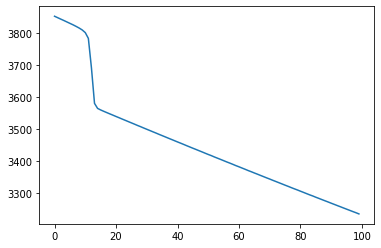

In [16]:
plt.plot(Hist_1.history['loss'])
plt.show()

# loss는 줄어들었다

- 학습되지 않음
  - 녹색 -> 정답(y_test)
  - 적색 -> 예측(y_hat)

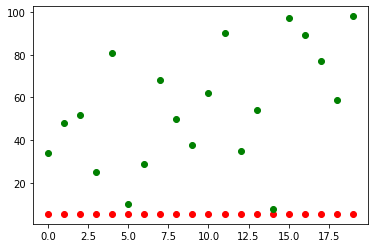

In [17]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

# epoch를 더 많이 돌리면 학습이 된다
# normalization하면 성능이 훨씬 좋아진다

## 2. SimpleRNN - with Normalization

### 1) Sample Data - with Normalization

In [83]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

### 2) Casting

In [84]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [85]:
X.shape, y.shape

((100, 5, 1), (100,))

### 3) Train/Test Split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

### 4) Keras SimpleRNN Modeling

#### (1) Model Define & Summary
- None: input_length 자동 맞춤

In [87]:
model_2 = models.Sequential(name = 'SimpleRNN_2')

model_2.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             # None이라고 하면 input_length를 자동으로 맞춰준다
                             return_sequences = False))
model_2.add(layers.Dense(1))

In [88]:
model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 3)                 15        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_2.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [90]:
Hist_2 = model_2.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 30ms/step - loss: 0.5763 - accuracy: 0.0231 - val_loss: 0.4389 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4308 - accuracy: 0.0066 - val_loss: 0.3713 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3916 - accuracy: 0.0136 - val_loss: 0.3113 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3399 - accuracy: 0.0107 - val_loss: 0.2606 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2758 - accuracy: 0.0136 - val_loss: 0.2193 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2690 - accuracy: 0.0344 - val_loss: 0.1841 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1711 - accuracy: 0.0136 - val_loss: 0.1564 - val_accur

In [91]:
y_hat = model_2.predict(X_test)

#### (2) Visualization
- Loss 감소

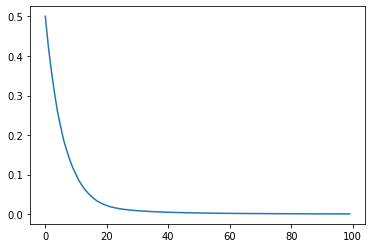

In [92]:
plt.plot(Hist_2.history['loss'])
plt.show()

- 학습 진행
  - y_test: green
  - y_hat: red

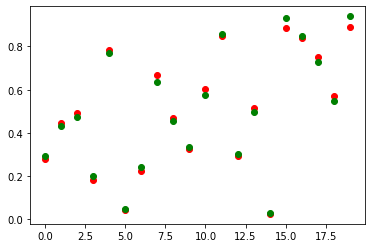

In [93]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

## 3. Stacked SimpleRNN - without Normalization

- return_sequences = True
- stack을 쌓을 때는 반드시 True로 지정하고 output-input 크기를 맞춰줘야 함
- Normalization을 하지 않으면 Stacked RNN도 학습되지 않음
- 쌓으면 성능이 좋아지는가? 해봐야 안다(하이퍼 파라미터)
- 하나의 레이어만 쓰는 것이 일반적

In [38]:
model_3 = models.Sequential(name = 'Stacked_RNN')

model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = True))
                             # output이 각각 나오도록 지정해줘야 함 
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False))
model_3.add(layers.Dense(1))

In [39]:
model_3.summary()

Model: "Stacked_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_3.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [41]:
Hist_3 = model_3.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 44ms/step - loss: 3733.9592 - accuracy: 0.0000e+00 - val_loss: 3643.6946 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 3525.0781 - accuracy: 0.0000e+00 - val_loss: 3636.2544 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 3858.5233 - accuracy: 0.0000e+00 - val_loss: 3629.7656 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 3384.3556 - accuracy: 0.0000e+00 - val_loss: 3623.7944 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 3660.6260 - accuracy: 0.0000e+00 - val_loss: 3617.9126 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 3683.7516 - accuracy: 0.0000e+00 - val_loss: 3612.0366 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - lo

In [42]:
y_hat = model_3.predict(X_test)

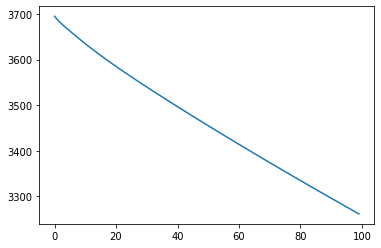

In [43]:
plt.plot(Hist_3.history['loss'])
plt.show()

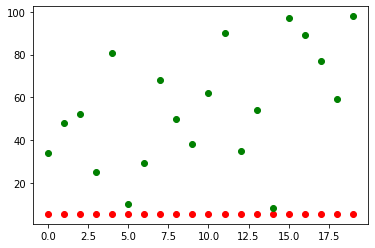

In [44]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')

## 4. Stacked SimpleRNN - with Normalization

In [48]:
model_4 = models.Sequential(name = 'Stacked_RNN')

model_4.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = True))
# False 로 주면 (1, 3)만 나오게 되고, 그걸로 순환하면서 학습할 수가 없다
# (5, 3)으로 모든 값을 다음 layer에 전달해야 한다
model_4.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False))
model_4.add(layers.Dense(1))

In [49]:
model_4.summary()

Model: "Stacked_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_4.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [51]:
Hist_4 = model_4.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 40ms/step - loss: 0.0878 - accuracy: 0.0101 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0542 - accuracy: 0.0281 - val_loss: 0.0338 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.0099 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0151 - accuracy: 0.0171 - val_loss: 0.0142 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0128 - accuracy: 0.0221 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.0132 - val_loss: 0.0118 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0096 - accuracy: 0.0157 - val_loss: 0.0111 - val_accur

In [52]:
y_hat = model_4.predict(X_test)

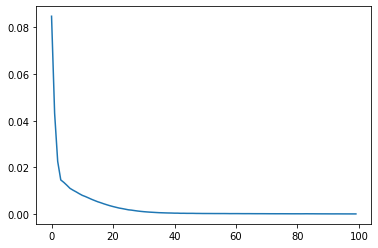

In [53]:
plt.plot(Hist_4.history['loss'])
plt.show()

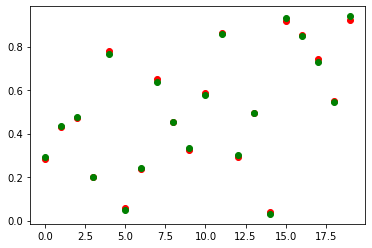

In [55]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

## 5. 'return_sequences' Output Options
- 'input_length'에 대한 Sequence 전체를 출력할지 설정
  - 'False' vs. 'True'

### 1) 실습데이터 생성

In [56]:
X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

### 2) 테스트용 Input Data

In [58]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

### 3) False option
- 마지막 output만 출력
  - Unit -> 1

In [60]:
Model_False = models.Sequential()

Model_False.add(layers.SimpleRNN(1,
                                input_shape = (5, 1),
                                return_sequences = False))
# DNN layer가 빠짐

# unit의 개수가 하나
# return_sequences = False: 

In [61]:
Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [62]:
Model_False.predict(X_test[0].reshape(1, 5, 1))
# 학습시키지 않고 predict 값만 빼옴(모양을 보기 위해)
# 최종적으로 하나의 output만 내보냄

array([[1.]], dtype=float32)

- 마지막 Output만 출력
  - Unit -> 3

In [63]:
Model_False = models.Sequential()

Model_False.add(layers.SimpleRNN(3,
                                 input_shape = (5, 1),
                                 return_sequences = False))

In [64]:
Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [65]:
Model_False.predict(X_test[0].reshape(1, 5, 1))
# unit이 3개
# unit마다 각각 5번 돎
# 마지막 하나의 값만 전달됨 (전달만 될 뿐 나오는 건 마지막 하나)

array([[-0.99999356, -1.        ,  1.        ]], dtype=float32)

### 4) True Option
- 매 순환마다 Output 출력
  - Unit -> 1
  - input_length -> 5

In [66]:
Model_True = models.Sequential()

Model_True.add(layers.SimpleRNN(1,
                                input_shape = (5, 1),
                                return_sequences = True))

In [67]:
Model_True.compile(loss ='mse',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [68]:
Model_True.predict(X_test[0].reshape(1, 5, 1))
# input이 5개니까 5번 돌게 됨
# 돌 때마다 output이 나옴

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)

- 매 순환마다 Output만 출력
  - Unit -> 3
  - input_length -> 5

In [69]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3,
                                input_shape = (5, 1),
                                return_sequences = True))

In [70]:
Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [71]:
Model_True.predict(X_test[0].reshape(1, 5, 1))
# unit마다 순환마다 값을 내보냄

array([[[ 1.,  1., -1.],
        [ 1.,  1., -1.],
        [ 1.,  1., -1.],
        [ 1.,  1., -1.],
        [ 1.,  1., -1.]]], dtype=float32)

- one-to-one, one-to-many, many-to-one, many-to-many 등을 구현할 수 있게 된다